In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import multiprocessing
import matplotlib
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import svm


#Taking input from csv file and taking x and y out
data=pd.read_csv("19/train.csv",header=None)

data=data.to_numpy()


X_train=data[:,0:2]
Y_train=data[:,2]


data=pd.read_csv("19/dev.csv",header=None)
#data.columns =['x1', 'x2','Class']
    
X_valid=data.loc[np.r_[0:15, 30:45, 60:75],:]



X_valid=X_valid.to_numpy()

Y_valid=X_valid[:,-1]
X_valid=X_valid[:,:-1]

data=pd.read_csv("19/dev.csv",header=None)

    
X_test=data.loc[np.r_[15:30, 45:60, 75:90],:]



X_test=X_test.to_numpy()

Y_test=X_test[:,-1]
X_test=X_test[:,:-1]


C=[0.0001,0.001,0.01,0.1,4,16,50,75,100,150,200,500]
#print(X_train.shape)

for c in C:
    clf = svm.SVC(C=c,kernel='rbf',decision_function_shape='ovr')
    clf.fit(X_train, Y_train)
    #print(clf.predict(X_valid))
    predicted=clf.predict(X_valid)
    print("accuracy for C="+str(c)+" on validation set is "+str(accuracy_score(Y_valid,predicted)*100))
    predicted=clf.predict(X_train)
    print("accuracy for C="+str(c)+" on training set is "+str(accuracy_score(Y_train,predicted)*100))

clf = svm.SVC(C=75,kernel='rbf',decision_function_shape='ovr')
clf.fit(X_train, Y_train)
predicted=clf.predict(X_test)
print("accuracy for C="+str(75)+" (Best Model) on testing set is "+str(accuracy_score(Y_test,predicted)*100))



accuracy for C=0.0001 on validation set is 66.66666666666666
accuracy for C=0.0001 on training set is 70.83333333333334
accuracy for C=0.001 on validation set is 66.66666666666666
accuracy for C=0.001 on training set is 70.83333333333334
accuracy for C=0.01 on validation set is 66.66666666666666
accuracy for C=0.01 on training set is 70.83333333333334
accuracy for C=0.1 on validation set is 95.55555555555556
accuracy for C=0.1 on training set is 96.16666666666667
accuracy for C=4 on validation set is 100.0
accuracy for C=4 on training set is 99.33333333333333
accuracy for C=16 on validation set is 100.0
accuracy for C=16 on training set is 99.5
accuracy for C=50 on validation set is 100.0
accuracy for C=50 on training set is 99.5
accuracy for C=75 on validation set is 100.0
accuracy for C=75 on training set is 99.66666666666667
accuracy for C=100 on validation set is 100.0
accuracy for C=100 on training set is 99.66666666666667
accuracy for C=150 on validation set is 100.0
accuracy for

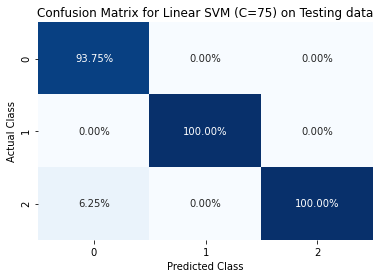

In [24]:
confuse=confusion_matrix(Y_test,predicted)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title(f'Confusion Matrix for Linear SVM (C={75}) on Testing data')
#plt.savefig('Confusion_test_2.png')

plt.show()



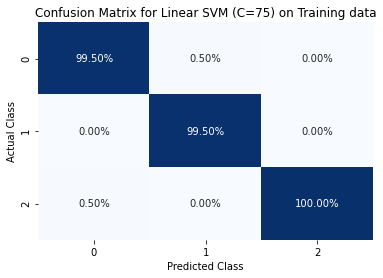

In [25]:
predicted=clf.predict(X_train)
confuse=confusion_matrix(Y_train,predicted)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title(f'Confusion Matrix for Linear SVM (C=75) on Training data')
#plt.savefig('Confusion_test_2.png')

plt.show()



In [26]:
#print(clf.support_vectors_)
#print(np.where(X_train == clf.support_vectors_[0]))

#tp=np.delete(X_train[:,0],np.where(X_train[:,0] == clf.support_vectors_[:,0]))
#print(X_train.shape)
#print(X_train[:,0])
tp=np.setdiff1d(X_train[:,0],clf.support_vectors_[:,0])
print(X_train[~np.in1d(X_train[:,0],clf.support_vectors_[:,0])].shape)


(556, 2)


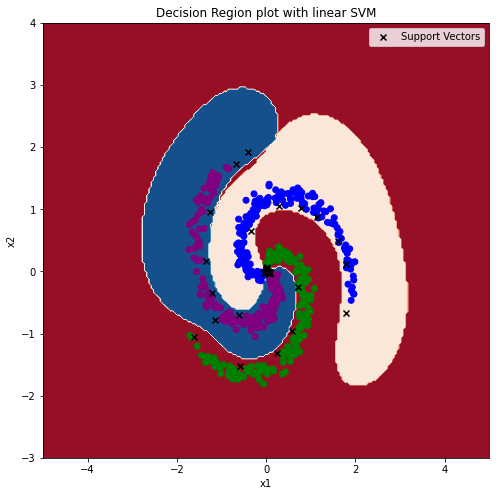

In [27]:
x1=np.linspace(-5,5,num=200)
x2=np.linspace(-3,4,num=200)
xx1, xx2 = np.meshgrid(x1, x2)
r1, r2 = xx1.flatten(), xx2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
#print(grid)
#predicted.clear()
num_cores = multiprocessing.cpu_count()

#predicted = Parallel(n_jobs=num_cores)(delayed(predict_covdif)(grid[i],means,covdif,counts) for i in range(grid.shape[0]))
predicted=clf.predict(grid)
pos=np.empty(xx1.shape+(2,))
pos[:,:,0]=xx1
pos[:,:,1]=xx2


predicted=np.array(predicted)
predicted=predicted.reshape(xx1.shape)
fig = plt.figure(figsize=(8,8))
plt.contourf(xx1, xx2, predicted, cmap='RdBu')
colors = ['green','red','blue','purple']
real=X_train[~np.in1d(X_train[:,0],clf.support_vectors_[:,0])]
plt.scatter(real[:,0], real[:,1], c=Y_train[~np.in1d(X_train[:,0],clf.support_vectors_[:,0])], cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(np.setdiff1d(X_train[:,0],clf.support_vectors_[:,0]), np.setdiff1d(X_train[:,1],clf.support_vectors_[:,1]), c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='RdBu')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], marker='x',label="Support Vectors",color='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Region plot with linear SVM')
plt.legend()
#plt.savefig('plot_Gaussian_2.png')
plt.show()


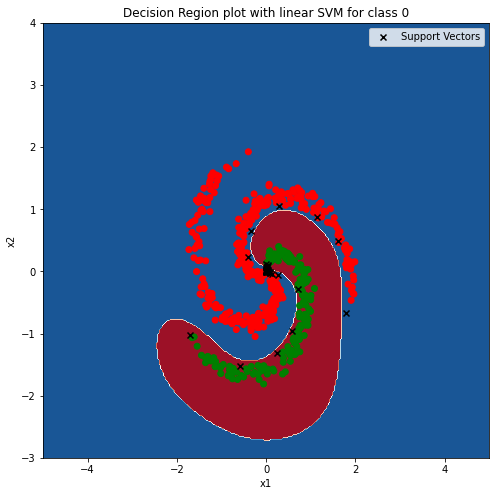

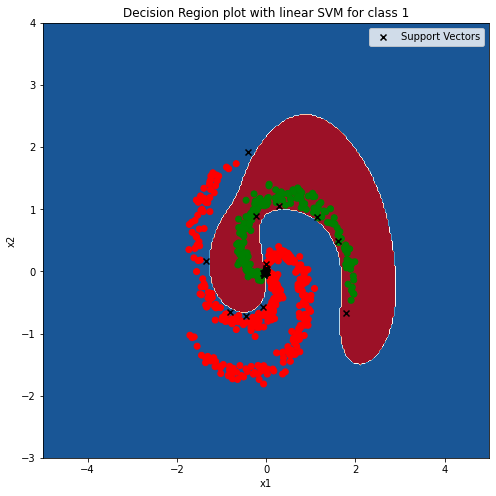

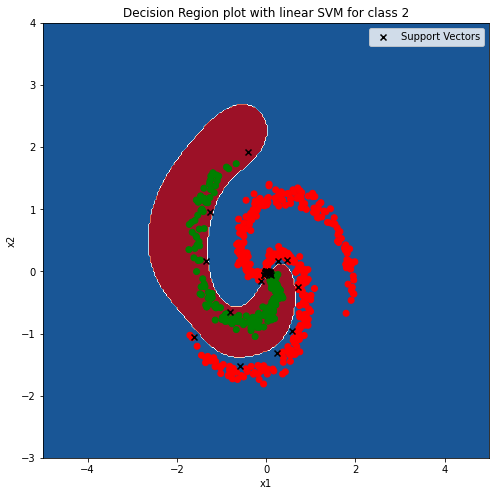

In [21]:
(unique, counts) = np.unique(Y_train, return_counts=True)
#print(unique)
for i in range(len(unique)):

    X_new_train=X_train[np.where(Y_train==i)]
    X_new_train=np.vstack((X_new_train,X_train[np.where(Y_train!=i)]))
    #print(X_new_train.shape)
    #Y_new_train=np.hstack((Y_train[np.where(Y_train==i)],Y_train[np.where(Y_train==p)]))
    Y_new_train=np.zeros(Y_train[np.where(Y_train==i)].shape)
    Y_new_train=np.hstack((Y_new_train,np.ones(Y_train[np.where(Y_train!=i)].shape)))
    #print(Y_new_train.shape)
    #print(Y_new_train)
    clf.fit(X_new_train, Y_new_train)
    x1=np.linspace(-5,5,num=300)
    x2=np.linspace(-3,4,num=300)
    xx1, xx2 = np.meshgrid(x1, x2)
    r1, r2 = xx1.flatten(), xx2.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    #print(grid)
    #predicted.clear()
    num_cores = multiprocessing.cpu_count()

    #predicted = Parallel(n_jobs=num_cores)(delayed(predict_covdif)(grid[i],means,covdif,counts) for i in range(grid.shape[0]))
    predicted=clf.predict(grid)
    pos=np.empty(xx1.shape+(2,))
    pos[:,:,0]=xx1
    pos[:,:,1]=xx2


    predicted=np.array(predicted)
    predicted=predicted.reshape(xx1.shape)
    fig = plt.figure(figsize=(8,8))
    plt.contourf(xx1, xx2, predicted, cmap='RdBu')
    colors = ['green','red']
    real=X_new_train[~np.in1d(X_new_train[:,0],clf.support_vectors_[:,0])]
    plt.scatter(real[:,0], real[:,1], c=Y_new_train[~np.in1d(X_new_train[:,0],clf.support_vectors_[:,0])], cmap=matplotlib.colors.ListedColormap(colors))
    #plt.scatter(np.setdiff1d(X_train[:,0],clf.support_vectors_[:,0]), np.setdiff1d(X_train[:,1],clf.support_vectors_[:,1]), c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))
    #plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='RdBu')
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], marker='x',label="Support Vectors",color='black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Region plot with linear SVM for class {i}')
    plt.legend()
    #plt.savefig('plot_Gaussian_2.png')
    plt.show()
